In [1]:
en_text = "A Dog Run back corner near spare bedrooms"

In [3]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
print(word_tokenize(en_text))

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/igwanhyeong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
print(en_text.split())

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


In [5]:
kor_text = "사과의 놀라운 효능이라는 글을 봤어. 그래서 오늘 사과를 먹으려고 했는데 사과가 썩어서 슈퍼에 가서 사과랑 오렌지 사왔어"
print(kor_text.split())

['사과의', '놀라운', '효능이라는', '글을', '봤어.', '그래서', '오늘', '사과를', '먹으려고', '했는데', '사과가', '썩어서', '슈퍼에', '가서', '사과랑', '오렌지', '사왔어']


In [6]:
!pip install konlpy
!pip install mecab-python
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

  Preparing metadata (setup.py) ... done
  Created wheel for mecab-python: filename=mecab_python-1.0.0-py3-none-any.whl size=1232 sha256=35bb44b9a8ac5fc9b2b3e90ecc00fc7b1ca34ca830e99862ff4b4da87893e613
  Stored in directory: /Users/igwanhyeong/Library/Caches/pip/wheels/63/09/15/cc401a7f8d041043978f3f60e64f7d65014522e104b7c9d1f2
Successfully built mecab-python
Install mecab-ko
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0   535k      0  0:00:02  0:00:02 --:--:-- 1453k
x mecab-0.996-ko-0.9.2/
x mecab-0.996-ko-0.9.2/example/
x mecab-0.996-ko-0.9.2/example/example.cpp
x mecab-0.996-ko-0.9.2/example/example_lattice.cpp
x mecab-0.996-ko-0.9.2/example/example_lattice.c
x mecab-0.996-ko-0.9.2/example/example.c
x mecab-0.996-ko-0.9.2/example/thread_test.cpp
x mecab-0.996-ko-0

In [7]:
from konlpy.tag import Mecab
tokenizer = Mecab()
print(tokenizer.morphs(kor_text))

['사과', '의', '놀라운', '효능', '이', '라는', '글', '을', '봤', '어', '.', '그래서', '오늘', '사과', '를', '먹', '으려고', '했', '는데', '사과', '가', '썩', '어서', '슈퍼', '에', '가', '서', '사과', '랑', '오렌지', '사', '왔', '어']


In [8]:
print(list(en_text))

['A', ' ', 'D', 'o', 'g', ' ', 'R', 'u', 'n', ' ', 'b', 'a', 'c', 'k', ' ', 'c', 'o', 'r', 'n', 'e', 'r', ' ', 'n', 'e', 'a', 'r', ' ', 's', 'p', 'a', 'r', 'e', ' ', 'b', 'e', 'd', 'r', 'o', 'o', 'm', 's']


In [9]:
import urllib.request
import pandas as pd
from konlpy.tag import Mecab
from nltk import FreqDist
import numpy as np
import matplotlib.pyplot as plt

In [10]:
urllib.request.urlretrieve('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt', filename = 'ratings.txt')
data = pd.read_table('ratings.txt')
data[:10]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [11]:
print('전체 샘플의 수: {}'.format(len(data)))

전체 샘플의 수: 200000


In [12]:
sample_data = data[:100]

In [13]:
sample_data['document'] = sample_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]', '', regex=True)
sample_data[:10]

/var/folders/py/xgf_87rd5nz9rsbc143wp9qc0000gn/T/ipykernel_61392/999551560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data['document'] = sample_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]', '', regex=True)


,id,document,label
0,8112052,어릴때보고지금다시봐도재밌어요ㅋㅋ,1
1,8132799,디자인을배우는학생으로외국디자이너와그들이일군전통을통해발전해가는문화산업이부러웠는데사실우...,1
2,4655635,폴리스스토리시리즈는부터뉴까지버릴께하나도없음최고,1
3,9251303,와연기가진짜개쩔구나지루할거라고생각했는데몰입해서봤다그래이런게진짜영화지,1
4,10067386,안개자욱한밤하늘에떠있는초승달같은영화,1
5,2190435,사랑을해본사람이라면처음부터끝까지웃을수있는영화,1
6,9279041,완전감동입니다다시봐도감동,1
7,7865729,개들의전쟁나오나요나오면빠로보고싶음,1
8,7477618,굿,1
9,9250537,바보가아니라병쉰인듯,1


In [14]:
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [15]:
tokenizer = Mecab()
tokenized = []
for sentence in sample_data['document']:
    temp = tokenizer.morphs(sentence)
    temp = [word for word in temp if not word in stopwords]
    tokenized.append(temp)

print(tokenized[:10])

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '학생', '외국', '디자이너', '그', '일군', '전통', '을', '통해', '발전', '해', '문화', '산업', '부러웠', '는데', '사실', '우리', '나라', '에서', '그', '어려운', '시절', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '전통', '있', '어', '저', '같', '사람', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '감사', '합니다'], ['폴리스', '스토리', '시리즈', '부터', '뉴', '까지', '버릴', '께', '하나', '없', '음', '최고'], ['연기', '진짜', '개', '쩔', '구나', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '밤하늘', '떠', '있', '초승달', '같', '영화'], ['사랑', '을', '해', '본', '사람', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '전쟁', '나오', '나요', '나오', '면', '빠', '로', '보', '고', '싶', '음'], ['굿'], ['바보', '아니', '라', '병', '쉰', '인', '듯']]


In [16]:
vocab = FreqDist(np.hstack(tokenized))
print('단어 집합의 크기: {}'.format(len(vocab)))

단어 집합의 크기: 656


In [17]:
vocab['재밌']

8

In [18]:
vocab_size = 500
vocab = vocab.most_common(vocab_size)
print('단어 집합의 크기: {}'.format(len(vocab)))

단어 집합의 크기: 500


In [19]:
word_to_index = {word[0] : index + 2 for index, word in enumerate(vocab)}
word_to_index['pad'] = 1
word_to_index['unk'] = 0

In [20]:
encoded = []
for line in tokenized:
    temp = []
    for w in line:
        try:
            temp.append(word_to_index[w])
        except KeyError:
            temp.append(word_to_index['unk'])
    encoded.append(temp)

In [21]:
print(encoded[:10])

[[78, 25, 9, 4, 47, 38, 79, 22, 26, 80], [185, 5, 81, 186, 187, 188, 48, 189, 113, 5, 190, 191, 23, 114, 192, 193, 12, 49, 82, 115, 27, 48, 194, 116, 117, 28, 195, 5, 196, 197, 14, 113, 7, 63, 50, 14, 39, 198, 5, 199, 4, 200, 15, 7, 83, 40, 201, 84], [202, 118, 203, 51, 204, 28, 205, 206, 52, 13, 29, 10], [53, 30, 119, 207, 208, 209, 210, 64, 41, 31, 12, 211, 120, 16, 2, 212, 65, 8, 30, 3, 32], [213, 214, 215, 216, 7, 217, 14, 3], [121, 5, 23, 33, 39, 122, 123, 51, 117, 28, 85, 5, 15, 7, 3], [124, 34, 218, 38, 79, 34], [119, 219, 54, 220, 54, 86, 221, 35, 9, 4, 42, 29], [55], [222, 87, 88, 223, 224, 56, 89]]


리뷰의 최대 길이 : 62
리뷰의 최소 길이 : 1
리뷰의 평균 길이 : 13.510000


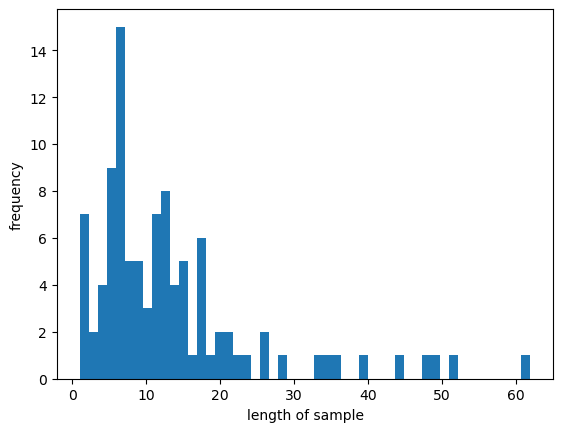

In [22]:
max_len = max(len(l) for l in encoded)
print('리뷰의 최대 길이 : %d' % max_len)
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded)) / len(encoded)))
plt.hist([len(s) for s in encoded], bins = 50)
plt.xlabel('length of sample')
plt.ylabel('frequency')
plt.show()

In [23]:
for line in encoded:
    if len(line) < max_len:
        line += [word_to_index['pad']] * (max_len - len(line))

In [24]:
print('리뷰의 최대 길이 : %d' % max(len(l) for l in encoded))
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded)) / len(encoded)))

리뷰의 최대 길이 : 62
리뷰의 최소 길이 : 62
리뷰의 평균 길이 : 62.000000


In [25]:
print(encoded[:3])

[[78, 25, 9, 4, 47, 38, 79, 22, 26, 80, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [185, 5, 81, 186, 187, 188, 48, 189, 113, 5, 190, 191, 23, 114, 192, 193, 12, 49, 82, 115, 27, 48, 194, 116, 117, 28, 195, 5, 196, 197, 14, 113, 7, 63, 50, 14, 39, 198, 5, 199, 4, 200, 15, 7, 83, 40, 201, 84, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [202, 118, 203, 51, 204, 28, 205, 206, 52, 13, 29, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
